# Homework 7: Demonstrate Central Tendency and the Normal Distribution

Useful Packages:
  - numpy
    - numpy.random
  - ipywidgets
    - ipywidgets.interact
  - matplotlib

## 1) Write a function that returns N random values taken from a uniform distribution of values between 0 and 1.
```python
def uniform_gen(N):
   """returns N random values"""

uniform_gen(N=5)
>> [.4, .9, .1, .2, .4]
```

In [38]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import ipywidgets as widg
from ipywidgets import interact

%matplotlib inline

In [13]:
def uniform_gen(N):
    return random.uniform(low=0.0, high=1.0, size=N)

### 1b) Demonstrate the function's working by plotting its output in a histogram.

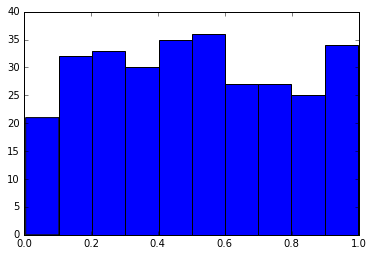

In [20]:
_ = plt.hist(uniform_gen(300))

### 1c) Make the plot interactive, allowing a user to move a slider widget to change the value of N

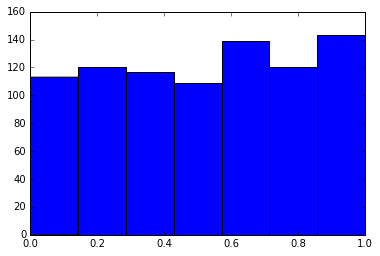

In [24]:
def uniform_plot(N):
    plt.hist(uniform_gen(N), bins=7)
    
interact(uniform_plot, N=300)

## 2) Write a function that takes an array of data and returns M random values from that array.
```python
def random_choice(data, M):
    """returns M random values from 'data'"""
    
random_choice(data=[.4, .9, .1, .2, .4], M=3)
>> [.9, .1, .2]
```

In [28]:
def random_choice(data, M):
    return random.choice(data, M)

## 3) Write a function that calls a given function P times and returns the mean of the function's output.

```python
def function_means(fun, P, *args, **kwargs):
   """calls fun(*args, **kwargs) P times, returning a list of means of fun's output."""
   
function_means(fun=random_choice, P=7, data=[.4, .9, .1, .2, .4], M=3)
>> [.43, .32, .71, .66, .54, .33, .59]
```

In [29]:
def function_means(fun, P, *args, **kwargs):
    return [np.mean(fun(*args, **kwargs)) for el in range(P)]

## 4) Write the Mega-Function, which takes P means from random-choice samples of M length from N uniformly-generated random values.

```python
def means_from_uniform_data(N, M, P):
   """
   returns a list of means of length P, obtained by getting 
   random subsets of length M from a randomly-generated sample of length N
   """
   
means_from_uniform_data(N=100, M=20, P=5)
>> [.45, .72, .55, .46, .69]
```


In [30]:
def means_from_uniform_data(N, M, P):
    return function_means(random_choice, P=P, data=uniform_gen(N), M=M)

### 4b) Plot a histogram of results from mean_from_uniform_data() when N=200, M=20, and P=2000.
Note: The resulting histogram should have a gaussian distribution.

(array([   5.,   32.,  104.,  276.,  416.,  565.,  394.,  163.,   37.,    8.]),
 array([ 0.26590526,  0.30938469,  0.35286412,  0.39634355,  0.43982298,
         0.48330241,  0.52678184,  0.57026127,  0.6137407 ,  0.65722013,
         0.70069956]),
 <a list of 10 Patch objects>)

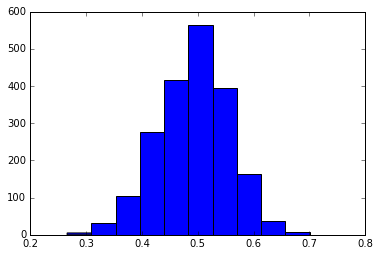

In [35]:
plt.hist(means_from_uniform_data(N=500, M=20, P=2000))

## 5) Make the Plot from 4b interactive, allowing the user to change N, M, and P

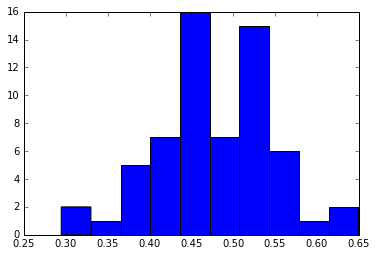

In [48]:
def plot_means(N=500, M=20, P=2000):
    plt.hist(means_from_uniform_data(N=N, M=M, P=P))
    
interact(plot_means, 
         N=widg.IntSlider(value=10, min=7, max=1000),
         M=widg.IntSlider(value=10, min=7, max=1000),
         P=widg.IntSlider(value=10, min=7, max=1000),
        )    